<a href="https://colab.research.google.com/github/Rice-from-data/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Ned_Horsey_LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [148]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [149]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [150]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [151]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [152]:
lambda_heights = [72,72,77,72,73,67,64,58,63,78]

import pandas as pd
import random
import statistics
from scipy import stats
import numpy as np

df = pd.DataFrame({'heights': lambda_heights})
df.head()             

,heights
0,72
1,72
2,77
3,72
4,73


In [153]:
df['heights'].mean()

69.6

In [154]:


random.seed(10)

population = []

for _ in range(1000):
  population.append(random.randint(0,1))
  
print(population)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [155]:

statistics.mean(population)

0.507

In [0]:


sample = random.sample(population, 100)

def mean(list):
  average = np.sum(list) / len(list)
  return average



In [157]:
print(mean(population))
print(mean(sample))

0.507
0.46


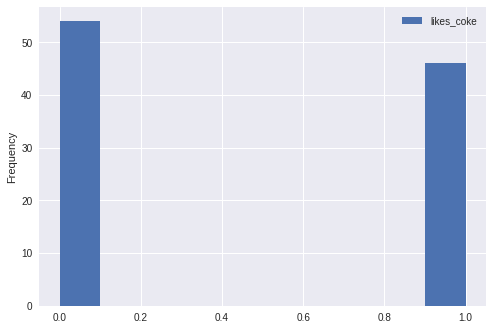

In [158]:
df = pd.DataFrame({'likes_coke': sample})


df.plot.hist();

In [159]:
dir(scipy.stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [160]:
scipy.stats.ttest_1samp(df['likes_coke'], mean(population))

Ttest_1sampResult(statistic=-0.9382955561680112, pvalue=0.3503760732929039)

In [161]:
def variance(list):
  return (np.sum((list-mean(list))**2)/(len(list)-1))
  
variance(df.likes_coke)
df.likes_coke.var()

0.250909090909091

In [162]:
def stddev(list):
  var = variance(list)
  return np.sqrt(var)

stddev(df.likes_coke)

0.5009082659620331

In [163]:
n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - mean(population)) / (stddev(df.likes_coke) / n ** (1/2) )
print(t_stat)

-0.9382955561680112


##P-Value

P-value is a threshold that we set for ourselves to denote "statistical significance" Statistical Significance means - the odds of me getting unlucky that I'm willing to deal with. The probability that I would have to see that says that these two differences are not just due to chance.

5% - Will only accept this result as reliable or significant if I calculate that this outcome has a 5% chance or less of happening just due to chance.

The probability that the pattern in our data that we're seeing could be produced by random data.

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [164]:
# TODO - your code here!

df_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

names = ['1. Class Name: 2 (democrat, republican)', 
'2. handicapped-infants: 2 (y,n)', 
'3. water-project-cost-sharing: 2 (y,n)',
'4. adoption-of-the-budget-resolution: 2 (y,n)', 
'5. physician-fee-freeze: 2 (y,n)', 
'6. el-salvador-aid: 2 (y,n)',
'7. religious-groups-in-schools: 2 (y,n)', 
'8. anti-satellite-test-ban: 2 (y,n)', 
'9. aid-to-nicaraguan-contras: 2 (y,n)', 
'10. mx-missile: 2 (y,n)', 
'11. immigration: 2 (y,n)', 
'12. synfuels-corporation-cutback: 2 (y,n)', 
'13. education-spending: 2 (y,n)', 
'14. superfund-right-to-sue: 2 (y,n)', 
'15. crime: 2 (y,n)',
'16. duty-free-exports: 2 (y,n)', 
'17. export-administration-act-south-africa: 2 (y,n)']



dfv = pd.read_csv(df_url, header=None, names=clean)

dfv.columns = dfv.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(': 2 (y,n)', '')


dfv.head()

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,"1._class_name:_2_democrat,_republican","2._handicapped-infants:_2_y,n","3._water-project-cost-sharing:_2_y,n","4._adoption-of-the-budget-resolution:_2_y,n","5._physician-fee-freeze:_2_y,n","6._el-salvador-aid:_2_y,n","7._religious-groups-in-schools:_2_y,n","8._anti-satellite-test-ban:_2_y,n","9._aid-to-nicaraguan-contras:_2_y,n","10._mx-missile:_2_y,n","11._immigration:_2_y,n","12._synfuels-corporation-cutback:_2_y,n","13._education-spending:_2_y,n","14._superfund-right-to-sue:_2_y,n","15._crime:_2_y,n","16._duty-free-exports:_2_y,n","17._export-administration-act-south-africa:_2_y,n"
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [165]:
# no nan values, or have I just not found them, let's see what the dytpes are. Oh that explains it

dfv.shape, dfv.isna().sum(), dfv.dtypes

((435, 17), 1._class_name:_2_democrat,_republican                0
 2._handicapped-infants:_2_y,n                        0
 3._water-project-cost-sharing:_2_y,n                 0
 4._adoption-of-the-budget-resolution:_2_y,n          0
 5._physician-fee-freeze:_2_y,n                       0
 6._el-salvador-aid:_2_y,n                            0
 7._religious-groups-in-schools:_2_y,n                0
 8._anti-satellite-test-ban:_2_y,n                    0
 9._aid-to-nicaraguan-contras:_2_y,n                  0
 10._mx-missile:_2_y,n                                0
 11._immigration:_2_y,n                               0
 12._synfuels-corporation-cutback:_2_y,n              0
 13._education-spending:_2_y,n                        0
 14._superfund-right-to-sue:_2_y,n                    0
 15._crime:_2_y,n                                     0
 16._duty-free-exports:_2_y,n                         0
 17._export-administration-act-south-africa:_2_y,n    0
 dtype: int64, 1._class_name:_2_democ

In [166]:
# I call this a bool filter but I'm doing a numerical filter so that I can sum columns to see what issues different groups boted for.
# the ? are abstentions (I think I read that in the descripiton), so I'm going to keep them as nans and basically ignore them unless there area large number of abstentions
boolean_filter = {'y' : 1, 'n' : 0, '?': np.nan}

dfv = dfv.replace(boolean_filter)

dfv.head()

,"1._class_name:_2_democrat,_republican","2._handicapped-infants:_2_y,n","3._water-project-cost-sharing:_2_y,n","4._adoption-of-the-budget-resolution:_2_y,n","5._physician-fee-freeze:_2_y,n","6._el-salvador-aid:_2_y,n","7._religious-groups-in-schools:_2_y,n","8._anti-satellite-test-ban:_2_y,n","9._aid-to-nicaraguan-contras:_2_y,n","10._mx-missile:_2_y,n","11._immigration:_2_y,n","12._synfuels-corporation-cutback:_2_y,n","13._education-spending:_2_y,n","14._superfund-right-to-sue:_2_y,n","15._crime:_2_y,n","16._duty-free-exports:_2_y,n","17._export-administration-act-south-africa:_2_y,n"
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [167]:
dfv[dfv['1._class_name:_2_democrat,_republican'] == 'republican'].sum() #.value_counts()

1._class_name:_2_democrat,_republican                republicanrepublicanrepublicanrepublicanrepubl...
2._handicapped-infants:_2_y,n                                                                       31
3._water-project-cost-sharing:_2_y,n                                                                75
4._adoption-of-the-budget-resolution:_2_y,n                                                         22
5._physician-fee-freeze:_2_y,n                                                                     163
6._el-salvador-aid:_2_y,n                                                                          157
7._religious-groups-in-schools:_2_y,n                                                              149
8._anti-satellite-test-ban:_2_y,n                                                                   39
9._aid-to-nicaraguan-contras:_2_y,n                                                                 24
10._mx-missile:_2_y,n                                                    

In [168]:
dfv[dfv['1._class_name:_2_democrat,_republican'] == 'democrat'].sum()

1._class_name:_2_democrat,_republican                democratdemocratdemocratdemocratdemocratdemocr...
2._handicapped-infants:_2_y,n                                                                      156
3._water-project-cost-sharing:_2_y,n                                                               120
4._adoption-of-the-budget-resolution:_2_y,n                                                        231
5._physician-fee-freeze:_2_y,n                                                                      14
6._el-salvador-aid:_2_y,n                                                                           55
7._religious-groups-in-schools:_2_y,n                                                              123
8._anti-satellite-test-ban:_2_y,n                                                                  200
9._aid-to-nicaraguan-contras:_2_y,n                                                                218
10._mx-missile:_2_y,n                                                    

In [169]:
# the above two cells show me what issues democrats and republicans vote differently on. I'm going to jump into group 5 since only 14 democrats vote yes but 163 republicans vote yes

repub_physician = dfv[dfv['1._class_name:_2_democrat,_republican'] == 'republican']['5._physician-fee-freeze:_2_y,n']
repub_physician.isna().sum()
# only 3 abstentions for republicans

dem_physician = dfv[dfv['1._class_name:_2_democrat,_republican'] == 'democrat']['5._physician-fee-freeze:_2_y,n']
dem_physician.isna().sum()

# 8 abstentions for dems

8

In [170]:
# now I'll do some testing:

from scipy.stats  import ttest_ind

ttest_ind(repub_physician, dem_physician)

Ttest_indResult(statistic=nan, pvalue=nan)

In [171]:
# so it looks like our NaNs are messing with our T and P values, I will now make an assumption, I think that since the majority of republicans voted YES, if a republican votes absent
# they want to vote no but are not going to anger their party majority so they abstain

repub_physician = dfv[dfv['1._class_name:_2_democrat,_republican'] == 'republican']['5._physician-fee-freeze:_2_y,n'] #.replace({np.nan : 0})

# likewise democrats almost unanimously voted no so I'm going to group their abstentions into yes
dem_physician = dfv[dfv['1._class_name:_2_democrat,_republican'] == 'democrat']['5._physician-fee-freeze:_2_y,n'] #.replace({np.nan : 1})

# now we ttest again
ttest_ind(repub_physician, dem_physician, nan_policy='omit'), repub_physician.mean(), dem_physician.mean()

(Ttest_indResult(statistic=49.36708157301406, pvalue=1.994262314074344e-177),
 0.9878787878787879,
 0.05405405405405406)

In [0]:
# so our Tvalue is 37.492211383901136, our p value is 4.744786177356844e-138, and our degrees of freedom 433 -duh that's how many observations we have -2
# so this means something, probably a significant difference, honestly, don't know


In [0]:
# I'm just goint graph these Tvalues and be done with it

df_repub = dfv[dfv['1._class_name:_2_democrat,_republican'] == 'republican']
df_dem = dfv[dfv['1._class_name:_2_democrat,_republican'] == 'democrat']

cols = df_repub.columns.tolist()

In [176]:
for x in cols:
  ttest_ind(df_repub[x], df_dem[x], nan_policy='omit')

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: ignored

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars